<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 8

## Neural Network classification

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

**What we are going to cover?:**

   *  Architecture of a neural network classification model
   *  Input shapes and output shapes of a classification model
      (features and labels)
   *  Creating custom data to view, fit on and predict on
   *  Steps in modelling
       *  Creating a  model
       *  setting a loss function
       *  optimizer
       *  creating a training loop
       *  evaluating a model
   *  Saving and laoding models
   *  Harnessing the power of non-linearity
   *  Different classification evaluation methods



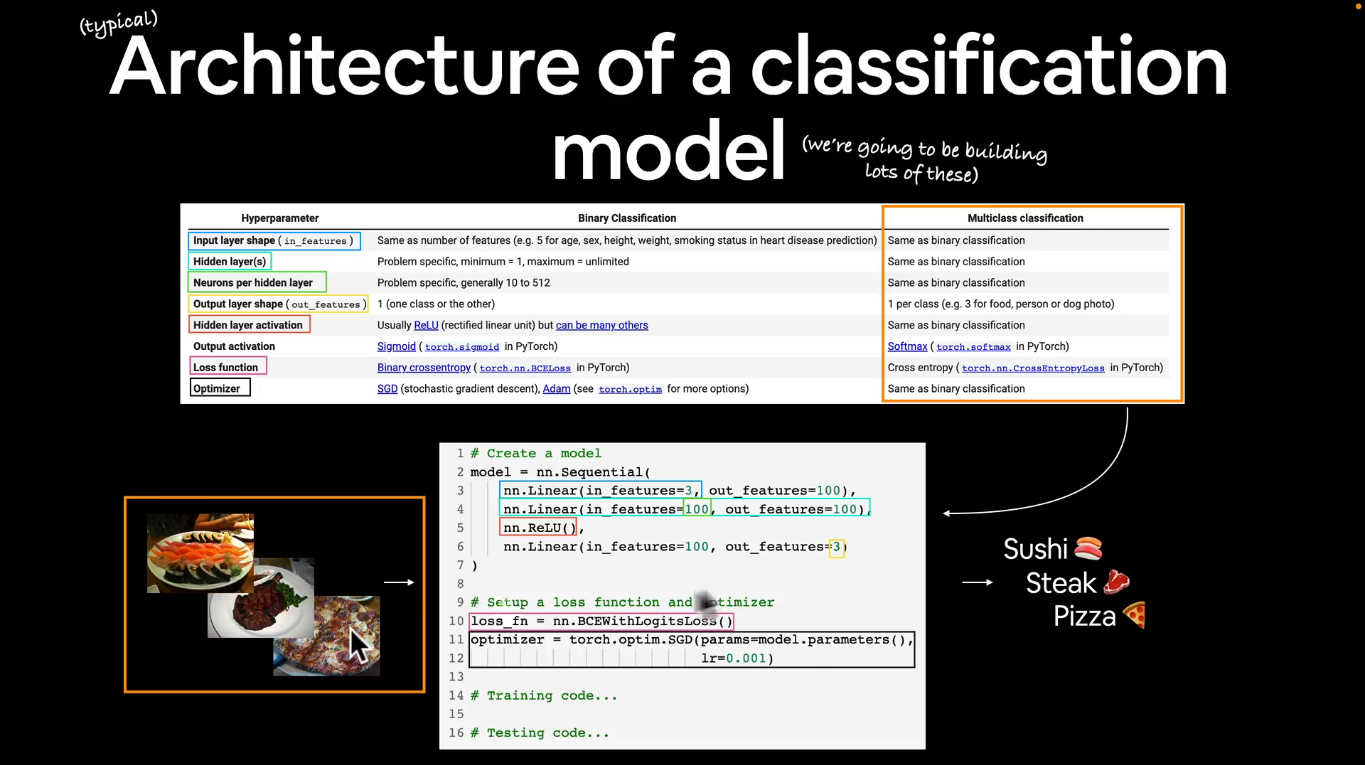

## Make classification data and get it ready


In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x,y = make_circles(n_samples,noise=0.03, random_state=42)


In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
 x.dtype

dtype('float64')

In [ ]:
print(f"First 5 samples of X:\n  {x[:5]}")
print(f"First 5 samples of Y:\n  {y[:5]}")

First 5 samples of X:
  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y:
  [1 1 1 1 0]


### Making dataframe of circle

In [ ]:
# Make dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:, 1],
                        "label": y})

circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


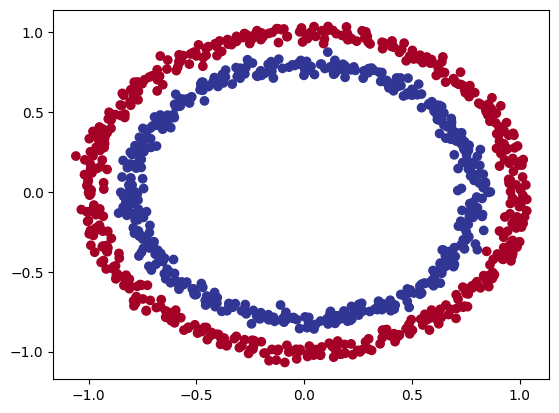

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

***Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable ennough to practice the fundamentals.***

# Day 9

## Check input an output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

### view the first sample of the features and label

In [ ]:
x[0]

array([0.75424625, 0.23148074])

In [ ]:
x_sample = x[0]
y_sample = y[0]

x_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

##Turn data into tensors and create train and test split

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x[:5]
y[:5]

tensor([1., 1., 1., 1., 0.])

In [ ]:
x.dtype

torch.float32

In [ ]:
# Splits data into training and test
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have setup device agnostic code, let's create a model that:

1.  Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of out data

3.  Defines a `forward()` method that outlines the forward pass (or forward computaion) of the model

4. Instantiate an instance of our model class and sened it to the target device

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

# 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

# 4. Instantiate an instance of our model class and send it to the target device
model_0 =  CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
 next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features = 1)
.to(device))

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

### Make predictions

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds =  model_0(x_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, Shape: {x_test.shape}")

print(f"\nFirst 10 predixtions:\n {untrained_preds[:10]}")
print(f"First 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predixtions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Day 10

##  Setup loss function and optimizer



**Which loss function or optimizer should you use?**

For example for regression uou might want MAE or MSE

for classification you might want binary cross or categorical cross entropy (cross entropy)


 * For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`

In [ ]:
# setup     the loss function

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

## Calculate Accuracy

In [ ]:
 # Calculate acccuracy - out of 100 examples, what percentage does out  model get right?

 def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train a nmodel


To train our model, we're going to need to build a training loop:

1.  Forward pass
2.  Calculate the loss
3.  Optimizer zero grad
4.  Loss Backward (backpropagation)
5.  Optimizer step (gradient descent)


#### Going from raw logits -> predictoin probabilities -> prediction labels

We can convert these **logits** into **prediction pobabilities** by passing them to some kind of activation function (e.g. sigmoid for binary crossentorpy and softmax for multiclass classification)

Then we can convert out model;s prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():

 y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
   # Use the sigmoid activation function on our model logits to turn them into
   y_pred_probs = torch.sigmoid(y_logits)
   y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

### sigmoid


For our prediction probability values, we need to perform a range-style rounding on them:

*  `y_pred_probs` >= 0.5, `y=1` (class1)
*  `y_pred_probs` < 0.5, `y=0`  (class 0)

In [ ]:
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

## Building a trining and testing loop



In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),y_train)

  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimize zero grad
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred= test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f},  Acc: {acc:.2f}%  | Test loss: {test_loss:.5f},  Test acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69796,  Acc: 51.88%  | Test loss: 0.69440,  Test acc: 58.00% 
Epoch: 10 | Loss: 0.69436,  Acc: 50.00%  | Test loss: 0.69389,  Test acc: 50.00% 
Epoch: 20 | Loss: 0.69514,  Acc: 49.88%  | Test loss: 0.69770,  Test acc: 50.50% 
Epoch: 30 | Loss: 0.69519,  Acc: 52.88%  | Test loss: 0.69850,  Test acc: 48.50% 
Epoch: 40 | Loss: 0.69542,  Acc: 45.12%  | Test loss: 0.69842,  Test acc: 43.50% 
Epoch: 50 | Loss: 0.69559,  Acc: 50.38%  | Test loss: 0.69873,  Test acc: 51.50% 
Epoch: 60 | Loss: 0.69421,  Acc: 53.75%  | Test loss: 0.69712,  Test acc: 46.50% 
Epoch: 70 | Loss: 0.69486,  Acc: 43.88%  | Test loss: 0.69732,  Test acc: 40.50% 
Epoch: 80 | Loss: 0.69422,  Acc: 50.50%  | Test loss: 0.69675,  Test acc: 50.50% 
Epoch: 90 | Loss: 0.69475,  Acc: 54.87%  | Test loss: 0.69576,  Test acc: 54.50% 


# Day 11

## Make predictions and evaluate the model


In [ ]:
import requests
from pathlib import Path
# Download helper functions from Learn Pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skippind download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skippind download


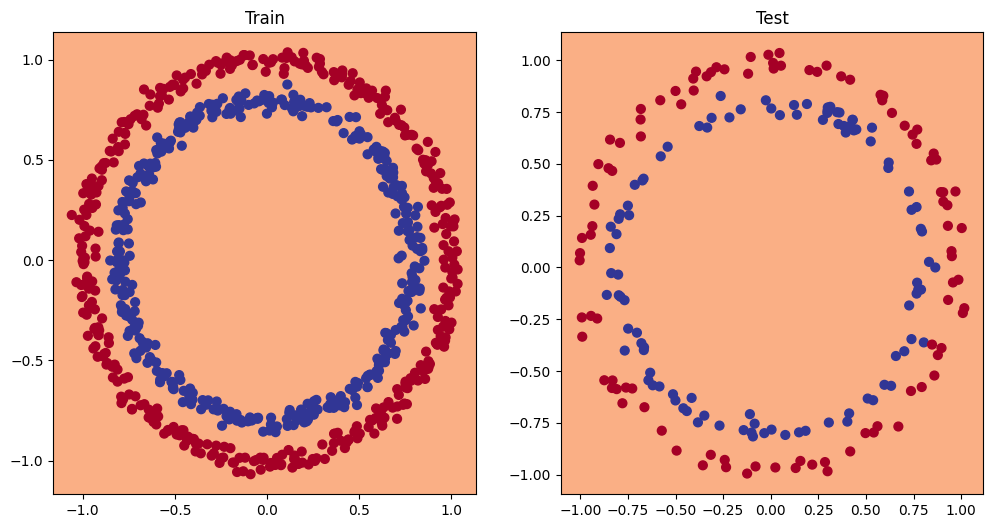

In [ ]:
# PLot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)


## Improving a  model (From a model prespective)

  *  Add more layers - give the model more chances to learn about patterns in the data

  * Add more hidden units - go from 5 hidden units to 10 hidden units

  *  Fit for longer
  *  Changing the actication functions
  *  Change the learning rate
  *  Change the loss function

  These options are all from a model's perspective because they deal directly with the model, rather than the data.

  And because these options are all values we (as machine learning engineers and data scientists) can change, they referred as **hyperparameters**.

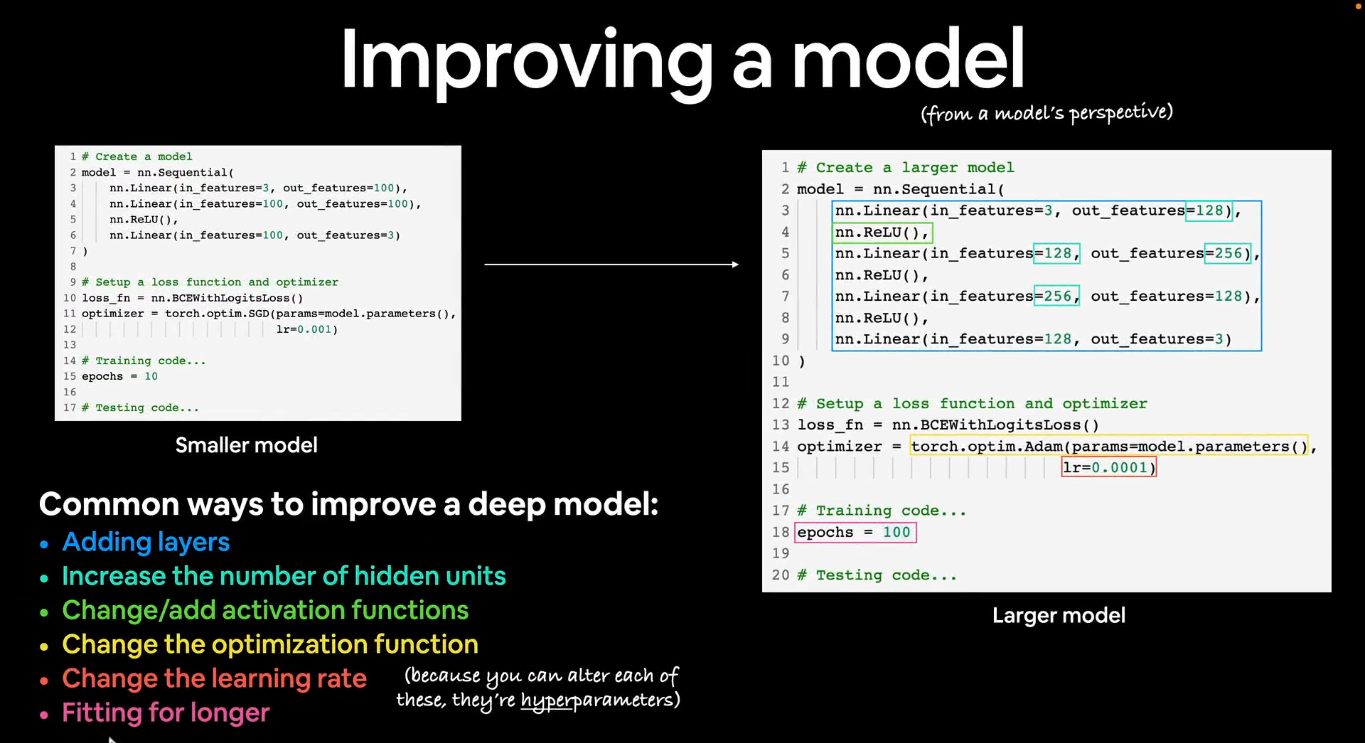

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
     super().__init__()
     self.layer_1 = nn.Linear(in_features=2, out_features=10)
     self.layer_2 = nn.Linear(in_features=10, out_features=10)
     self.layer_3 = nn.Linear(in_features=10, out_features = 1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)

    return z

model_1 = CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Train for  longer
epochs = 5000


# Put data on the target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true= y_train,y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing


  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calulate loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ")






Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00% 
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00% 
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00% 
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00% 
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00% 
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00% 
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1000 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1100 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1200 | Loss: 0.69298, Acc: 51.00%

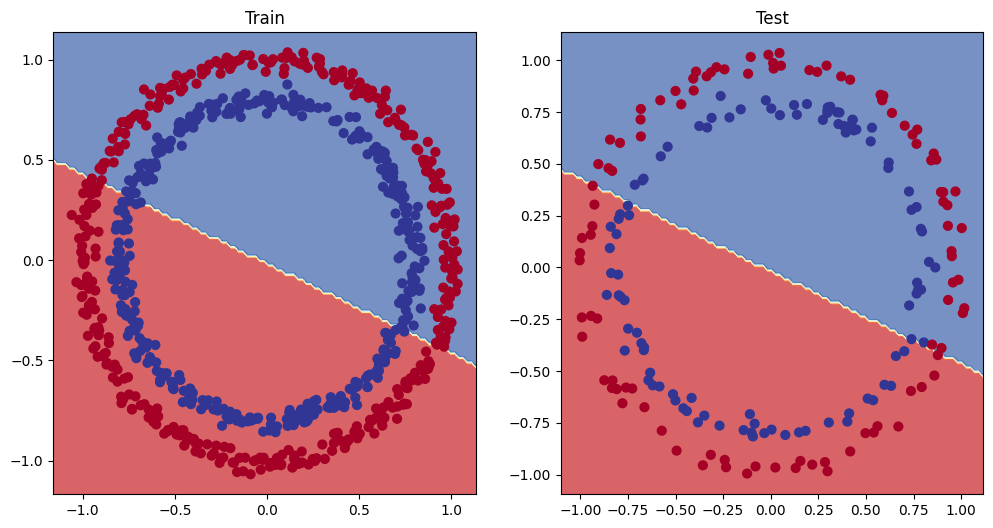

In [ ]:
# PLot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

### Preparing data to see if our  model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
#  Create some data  (same as notebook 01)

weight  = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
x_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

# check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]

x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

# check length
len(x_train_regression), len(x_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

# Day 12

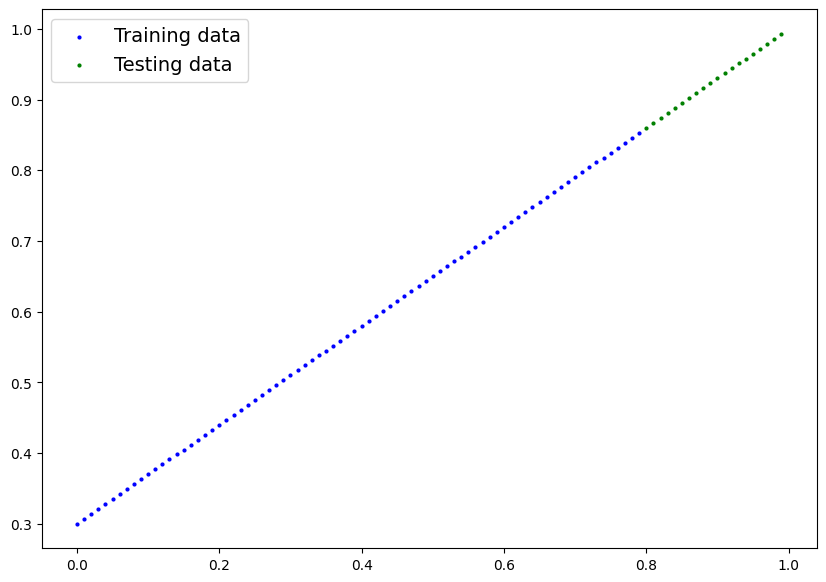

In [ ]:
plot_predictions(train_data=x_train_regression,
                 train_labels=y_train_regression,
                 test_data=x_test_regression,
                 test_labels=y_test_regression)

### Adjsuting `model_1` to fit a straight line

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Same   architecture as model_1 (but using nn.sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
## Loss and optimizer
loss_fn =nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [ ]:
# train the model

torch.manual_seed(42)

epochs = 1000

# put data onthe target device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)


# Training

for epoch in range(epochs):
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, | Test loss: {test_loss:.5f} ")



Epoch: 0 | Loss: 0.75986, | Test loss: 0.91103 
Epoch: 100 | Loss: 0.02858, | Test loss: 0.00081 
Epoch: 200 | Loss: 0.02533, | Test loss: 0.00209 
Epoch: 300 | Loss: 0.02137, | Test loss: 0.00305 
Epoch: 400 | Loss: 0.01964, | Test loss: 0.00341 
Epoch: 500 | Loss: 0.01940, | Test loss: 0.00387 
Epoch: 600 | Loss: 0.01903, | Test loss: 0.00379 
Epoch: 700 | Loss: 0.01878, | Test loss: 0.00381 
Epoch: 800 | Loss: 0.01840, | Test loss: 0.00329 
Epoch: 900 | Loss: 0.01798, | Test loss: 0.00360 


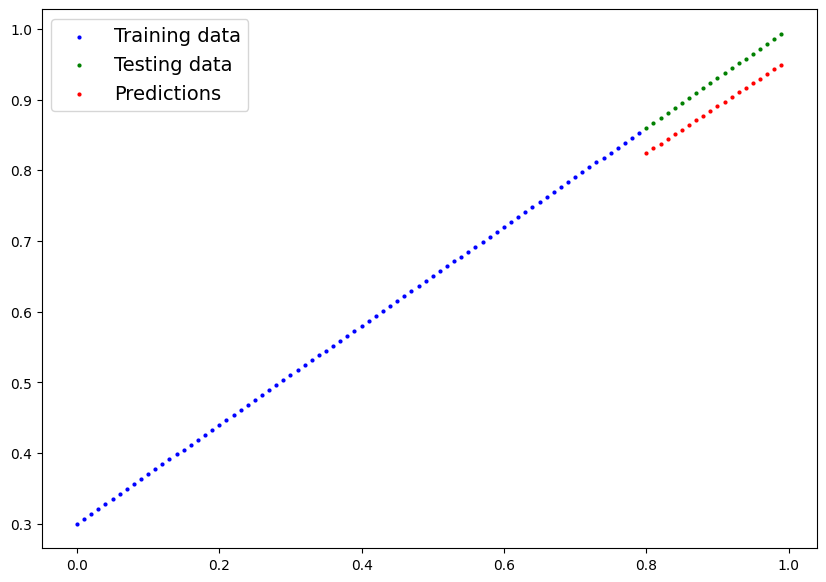

In [ ]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(x_test_regression)


# plot the prediction
plot_predictions(train_data=x_train_regression,
                 train_labels=y_train_regression,
                 test_data=x_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

### Observations and analysis

1. Training Data (Blue):
  * The training data forms a straight line, indicating a linear relationship between the input and output variables.

  * The model likely learned this linear relationship during trainig phase.

2. Testing Data:
  * The testing data also follows a similar linear trend as the training data, which is good becaue i tmeans the test data is from the same as the training data.

3. Predictions (RED):
  * The predictions are closely aligned with the testing data but slightly deviate towards the end. This indicates that while the model has captured the general trend of the data, it might not be perfectly accurate at the higher range of the input values.

  * The slight deviation could be due to overfitting, underfitting, or simply noise in the data.



### Model performance

* **Fit**: The model appears to fit the training data very well, indicating that it has learned the underlying pattern.

* **Generalization**: The model's predictions onthe testing tdata suggest it has generalized fairly well to new data, though there is a slight deviation.

#### Possible improvement
1. **More Data:** Adding more training data could help the model learn better and generalize more accurately.

2. **Regularization:** Techniques like L2 regularization might  help in reducing any potential overfitting.

3. **Model Complexity:** If the model is too simple, increasing its complexity (e.g. using polynomial regression instead of linear regression) might help. Conversly, if it's too complex, reducing complexity could help avoid overfitting.


## **The missing piece: non-linearity**

"What patterns could you draw if you were givenan infinite amount of a straight and non-straight lines?"

or in machine learning terms, an infinite (but it is finite) of linear and non - linear finctions?

### **Recreating non-linear data (red and blue circles)**



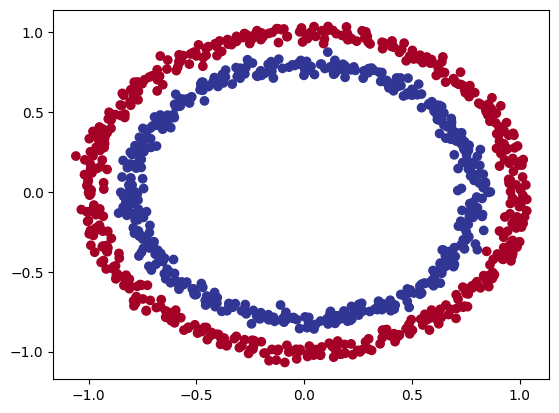

In [ ]:
# make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.RdYlBu)

In [ ]:
x.dtype

dtype('float64')

In [ ]:
type(x)

numpy.ndarray

### Train Test Split

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
x= torch.from_numpy(x).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# Split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Day 13


### **What is Activation function in neural network ?**

An activation function is a mathematical function that is applied to the output of a neuronin a neural network. It determines the output of the neuron based on its input.

***Why do we need ACtivation Functions?***

Without activation functions, neural networks would ne limited to modeling only linear relationships between inputs and outputs. Activation functions allows the network to learn and represent more complex, non-linear relationships in the data.

**Types of activation Functions**

There are many types of activation functions, each has its own characteristics and uses.

 *  **Sigmoid**: Maps the input to a value between 0 and 1, often used in binary classificaiton problems.

 *  **ReLU (Rectified Linear Unit)**: Maps all negative values to 0 and all positive values to a same value, ,often used in deep neural networks.

 *  **Tanh (Hyperbolic Tangent)**: Maps the input to a value between -1 and 1, often used in recurrent neural network.

 *  **Softmax**: Maps the input to a probability distribution over all classes, often used in multi-class classification problems.

 *  **Expoential Linear Unit**: Maps the input to a value between 0 and infinity, often used indeep neural networks.

 *  **Parametric Rectified Linear Unit (PReLU)** : Maps the input to a value between 0 and infinity, often used in deep neural networks.  

**How do Activation Function work?**

   1. The neural receives an input signal from the previous layer.
   2. The neural applies the activation function to the input signal.
   3. The Output of the activation function is the output of the neuron.
   4. The output of the neuron is passed to the next layer.
   
    

### Building a model with non-linearity

* Linear straight linear
* Non-linear = non-straight line

Artificial neural networks are large combination of linear (straight) and non-straight(non-linear) functions which are potentially able to find patterns in data.

In [ ]:
# Build a model with non-linear activation functions
import torch

from torch import nn
class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features =10)
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

model_3 = CircleModelv2().to(device)
model_3

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup and loss optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)



## Training a model with non-Linearity


In [ ]:
type(x)

torch.Tensor

In [ ]:
   # Random seeds
torch.manual_seed(42)

torch.cuda.manual_seed(42)

# x= torch.from_numpy(x).type(torch.float)
# y= torch.from_numpy(y).type(torch.float)

print(type(x))

# Put all data on target device
# x_train , y_train = x_train.to(device), y_train.to(device)
# x_test, y_test = x_test.to(deivce), y_test.to(deivce)

epochs = 1000


for epoch in range(epochs):
  model_3.train()

  #1 forward pass
  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing

  model_3.eval()
  with torch.inference_mode():
      test_logits = model_3(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits,y_test)
      test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ")









<class 'torch.Tensor'>
Epoch: 0 | Loss: 0.58306, Acc: 87.25% | Test loss: 0.59886, Test acc: 86.00% 
Epoch: 100 | Loss: 0.52641, Acc: 90.12% | Test loss: 0.54871, Test acc: 90.50% 
Epoch: 200 | Loss: 0.44689, Acc: 95.75% | Test loss: 0.48144, Test acc: 94.50% 
Epoch: 300 | Loss: 0.34838, Acc: 97.88% | Test loss: 0.39906, Test acc: 96.00% 
Epoch: 400 | Loss: 0.25392, Acc: 99.12% | Test loss: 0.31074, Test acc: 97.00% 
Epoch: 500 | Loss: 0.72674, Acc: 56.00% | Test loss: 1.08411, Test acc: 50.00% 
Epoch: 600 | Loss: 0.40508, Acc: 76.38% | Test loss: 0.52406, Test acc: 65.00% 
Epoch: 700 | Loss: 0.38567, Acc: 76.50% | Test loss: 0.50707, Test acc: 67.50% 
Epoch: 800 | Loss: 0.47010, Acc: 70.50% | Test loss: 0.65037, Test acc: 60.00% 
Epoch: 900 | Loss: 0.10666, Acc: 99.75% | Test loss: 0.15038, Test acc: 99.00% 


## Evaluating a model with non-linear activation funciton



In [ ]:
# Makes predictions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()


y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

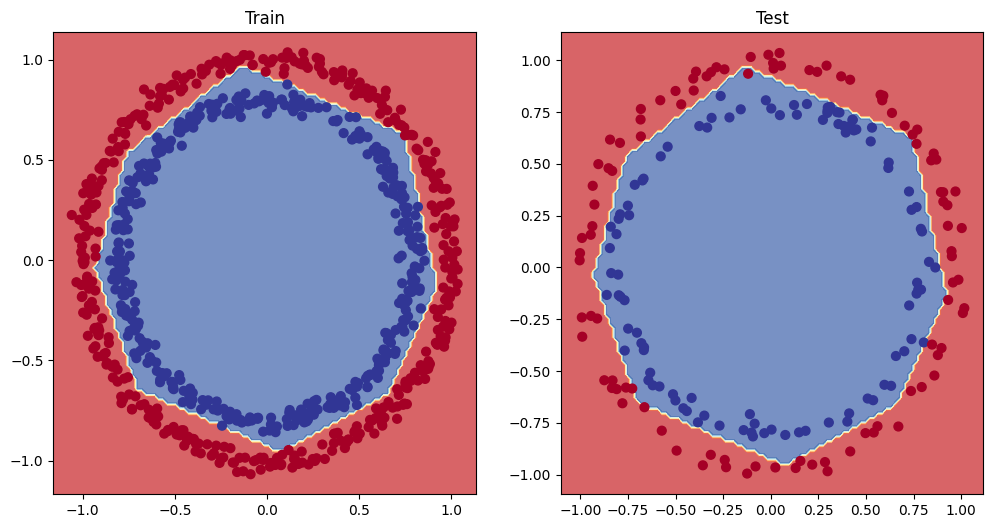

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,x_test,y_test)

### Desciption of Evaluated model


   *  **Train plot (Left)**: This plot shows how the model has learned to seprate the training data into two classes. The red and blue areas represent the regions where the momdel predicts each class.
   The points within each region are thactual training data points, with red points belonging to one class and blue points to the other. The model seems to fit the training data well, as the decision boundary closely follows the separation between the classes.

   *  **Test Plot (Right)**: This plot shows the models performance on the test data, which it hasnt seen during trainig. The regions and points are similar to the training plot, indicating that the model's decision boundary generalizes well to new, unseen data. the close match between the training and t est plots suggests that the model is not overfitting and is performing consistently.

## Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns indata and tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.

In [ ]:
 # Create a tensor
import torch
A = torch.arange(-10,10,1 ,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

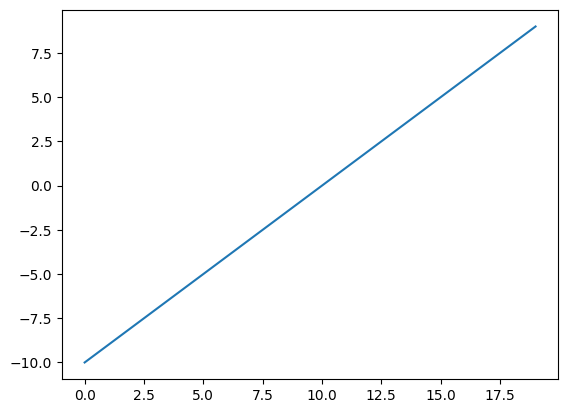

In [ ]:
import matplotlib.pyplot as plt
plt.plot(A)

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

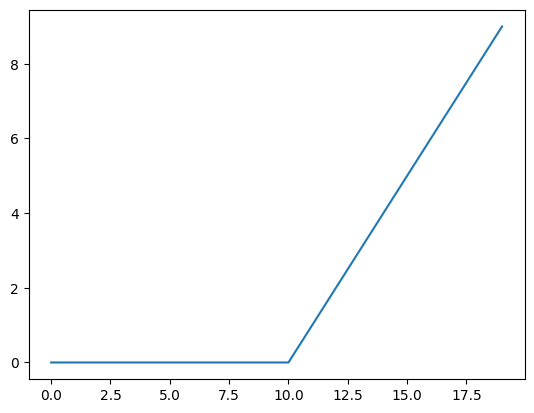

In [ ]:
# Plot ReLU Activation function
plt.plot(relu(A))

In [ ]:
# Now for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

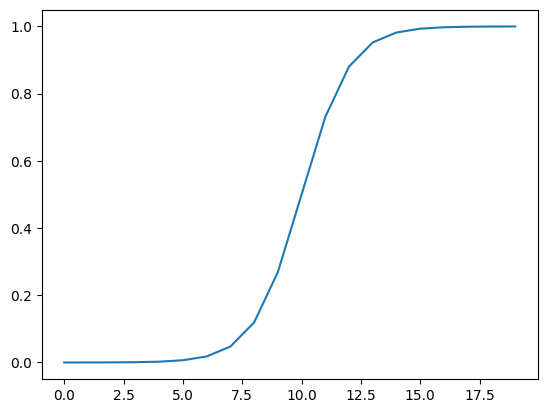

In [ ]:
plt.plot(sigmoid(A))

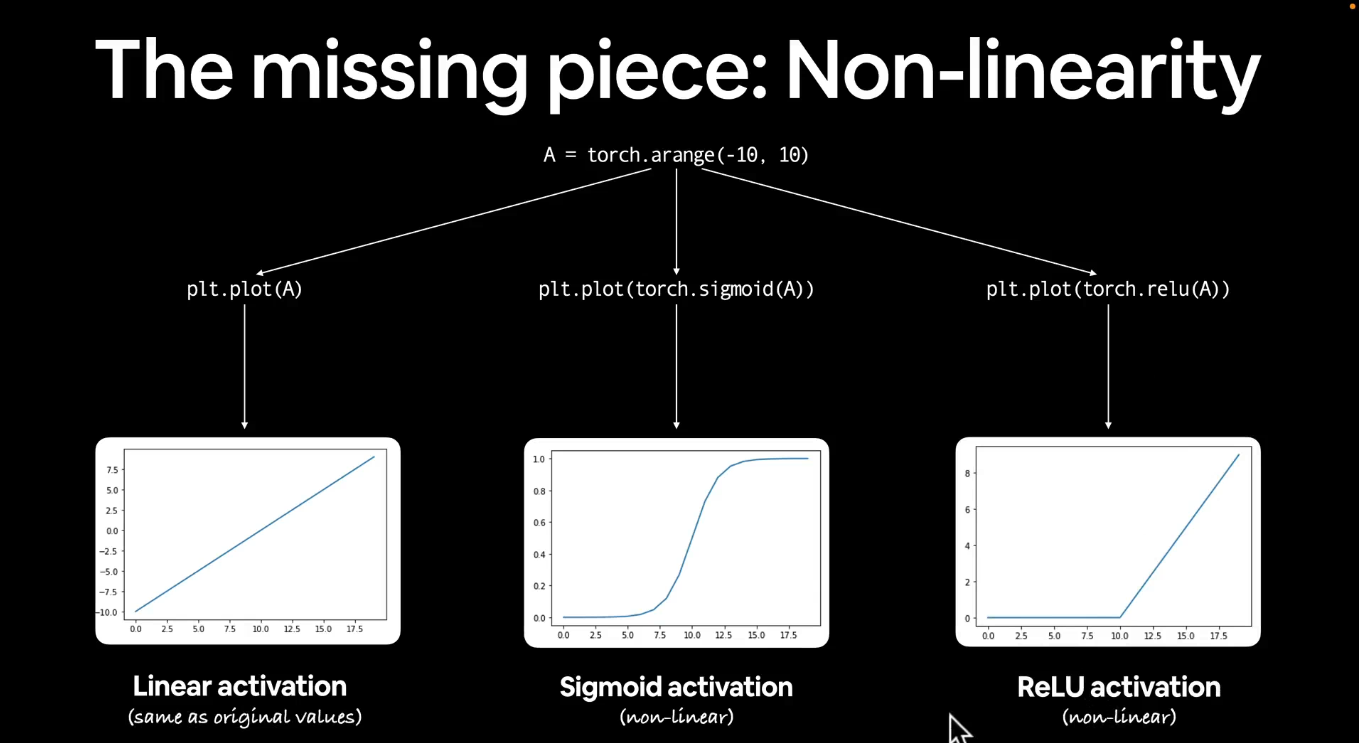

 ## Putting it all together with a multi-class classification

*  Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)

*  Multi-class classification = more than one thng or another (cat vs. dog vs. chicken)



### Creating a toy multi-class dataset


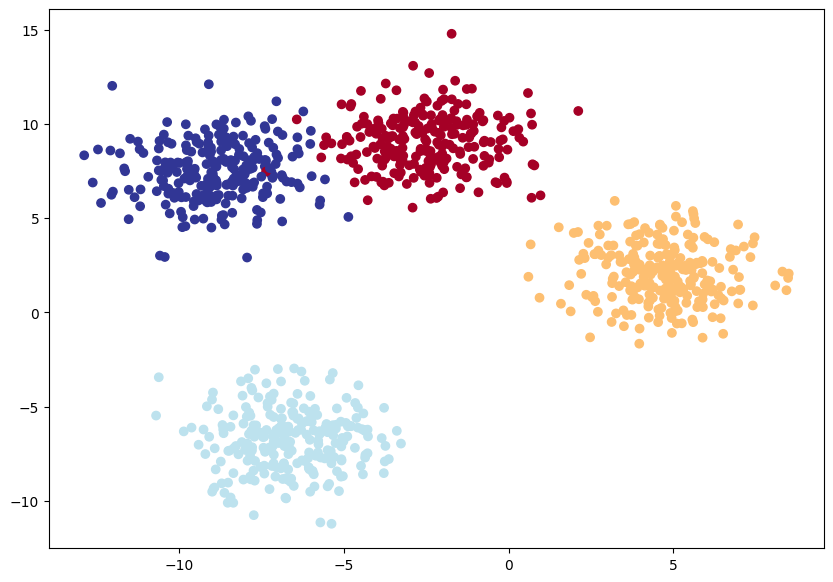

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data  creation
NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
x_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASS,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

# Turn data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)



# Split into train test

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,y_blob,test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Plot data

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi-class classification in PyTorch